# Importing packages

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math as math
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

# DATA EXPLORATORY ANALYSIS FOR CREDIT CARD DATA

## ANALYTICS IN CREDIT CARD INDUSTRY:

    Analytics has penetrated every industry owing to the various technology platforms that
    collect information and thus, the service providers know what exactly customers want. The
    Credit Card industry is no exception. Within credit card payment processing, there is a
    significant amount of data available that can be beneficial in countless ways.
    
    
    
### Understanding the customer behaviour

    The data available from a credit card processor identifies the types of consumer and their
    business spending behaviors. Hence, developing the marketing campaigns to directly
    address their behaviors indeed grows the revenue and these considerations will result in
    greater sales.
    
    
    
### Personalize offering based on data results

    Data also reveals specific interests and needs in individual customers that a company can
    leverage, this addressing their needs more efficiently. Specific promotions can be sent out
    related to where these customers are located and this builds sales more quickly.

### Use trends and patterns to get new customers
    
    The transactions and activities of the existing customers that they do in terms of purchase
    behavior tends to reflect larger trends that are coming. This information provides a strategy
    to go after possible customers in the target audience.

### Uncover suspicious activity

    The data from credit card processing is becoming increasingly important as a tool to fight
    fraud. When combined with artificial intelligence, this data is being analyzed quickly to
    uncover areas of purchase activity.

### Reduce chargebacks

    The ability to detect suspicious activity and patterns in data can also assess whether or not a
    transaction might result in a chargeback. Using analytics to track each transaction reveals
    anomalies. This information can help you reject that transaction and save your business
    from chargebacks.



# BUSINESS PROBLEM:

In order to effectively produce quality decisions in the modern credit card industry, knowledge must be gained through effective data analysis and modeling. Through the use of dynamic data-driven decision-making tools and procedures, information can be gathered to successfully evaluate all aspects of credit card operations. PSPD Bank has banking operations in more than 50 countries across the globe. Mr. Jim Watson, CEO, wants to evaluate areas of bankruptcy, fraud, and collections, respond to customer requests for help with proactive offers and service.


### DATA AVAILABLE -

##### This book has the following sheets:

Customer Acquisition: At the time of card issuing, company maintains the details of customers.

Spend (Transaction data): Credit card spend for each customer

Repayment: Credit card Payment done by customer

# Following are some of Mr. Watson’s questions to a Consultant (like you) to understand the customers spend & repayment behavior.
    1. In the above dataset,
    
         a. In case age is less than 18, replace it with mean of age values.
        
         b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
            (customer’s limit provided in acquisition table is the per transaction limit on his card)
        
         c. Incase the repayment amount is more than the limit, replace the repayment with the 
            limit.
        
    2. From the above dataset create the following summaries:
        
         a. How many distinct customers exist?
            
         b. How many distinct categories exist?
        
         c. What is the average monthly spend by customers?
            
         d. What is the average monthly repayment by customers?
        
         e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
            (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment 
            – Monthly spend. Interest is earned only on positive profits and not on negative amounts)
        
         f. What are the top 5 product types?
            
         g. Which city is having maximum spend?
        
         h. Which age group is spending more money?

         i. Who are the top 10 customers in terms of repayment?
        
        
    3. Calculate the city wise spend on each product on yearly basis. Also include a graphical 
        representation for the same.
    
    4. Create graphs for
         a. Monthly comparison of total spends, city wise
        
         b. Comparison of yearly spend on air tickets
            
         c. Comparison of monthly spend for each product (look for any seasonality
             that exists in terms of spend)
        
    5. Write user defined PYTHON function to perform the following analysis:
    
        You need to find top 10 customers for each city in terms of their repayment amount by 
        different products and by different time periods i.e. year or month. The user should be able 
        to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
        function should automatically take these inputs while identifying the top 10 customers.


##### Importing datasets

In [2]:
cust_ac = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data_Science_360/Case_studies/Completed/Python/Python_Foundation_Case_Study_2_Credit_Card_Case_Study/Case_Study_2_Credit_Card_Case_Study/Customer_Acqusition.csv")
spend = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data_Science_360/Case_studies/Completed/Python/Python_Foundation_Case_Study_2_Credit_Card_Case_Study/Case_Study_2_Credit_Card_Case_Study/spend.csv")
payment = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data_Science_360/Case_studies/Completed/Python/Python_Foundation_Case_Study_2_Credit_Card_Case_Study/Case_Study_2_Credit_Card_Case_Study/Repayment.csv")
credit_data = pd.read_excel("C:/Users/navee/OneDrive/Desktop/Data_Science_360/Case_studies/Completed/Python/Python_Foundation_Case_Study_2_Credit_Card_Case_Study/Case_Study_2_Credit_Card_Case_Study/Credit_Card_Data.xlsx")

In [3]:
cust_ac.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed


In [4]:
cust_ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [5]:
cust_ac.duplicated().sum()

0

In [6]:
cust_ac.describe()

,No,Age,Limit
count,100.000000,100.000000,100.000000
mean,50.500000,46.490000,284700.610000
std,29.011492,18.282572,218494.967852
min,1.000000,12.000000,10000.000000
25%,25.750000,33.750000,100000.000000
50%,50.500000,46.500000,300001.500000
75%,75.250000,60.250000,500000.000000
max,100.000000,79.000000,500000.000000


In [7]:
spend.head(1)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.8


In [8]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [9]:
spend.duplicated().sum()

0

In [10]:
spend['Month'] = pd.to_datetime(spend.Month)

In [11]:
spend.dtypes

Sl No:               int64
Customer            object
Month       datetime64[ns]
Type                object
Amount             float64
dtype: object

In [12]:
spend.describe()

,Sl No:,Amount
count,1500.000000,1500.000000
mean,750.500000,243096.049460
std,433.157015,141349.547367
min,1.000000,720.300000
25%,375.750000,122606.487500
50%,750.500000,239210.360000
75%,1125.250000,361617.632500
max,1500.000000,499793.490000


In [13]:
payment.head(1)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN


In [14]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SL No:      1499 non-null   float64
 1   Customer    1500 non-null   object 
 2   Month       1500 non-null   object 
 3   Amount      1500 non-null   float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 59.6+ KB


In [15]:
payment = payment.dropna(axis=1, how='all')
payment = payment.dropna(axis=0, how='all')

In [16]:
payment.isna().sum()

SL No:      1
Customer    0
Month       0
Amount      0
dtype: int64

In [17]:
payment.duplicated().sum()

0

In [18]:
payment['Month'] = pd.to_datetime(payment.Month)

In [19]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SL No:    1499 non-null   float64       
 1   Customer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 58.6+ KB


In [20]:
payment.describe()

,SL No:,Amount
count,1499.00000,1500.000000
mean,751.00000,247890.054420
std,432.86834,145290.382733
min,2.00000,55.860000
25%,376.50000,118604.905000
50%,751.00000,248008.185000
75%,1125.50000,367236.890000
max,1500.00000,499930.660000


In [21]:
credit_data.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,52.045263,BANGALORE,Gold,500000,C1,Self Employed


In [22]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    float64
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    int64  
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [23]:
credit_data.duplicated().sum()

0

In [24]:
credit_data.describe()

,No,Age,Limit
count,100.000000,100.000000,100.000000
mean,50.500000,38.237877,284700.610000
std,29.011492,24.226590,218494.967852
min,1.000000,0.109539,10000.000000
25%,25.750000,15.640192,100000.000000
50%,50.500000,37.836827,300001.500000
75%,75.250000,59.682310,500000.000000
max,100.000000,79.835106,500000.000000


## 1. In the above dataset

#### a. In case age is less than 18, replace it with mean of age values.

In [25]:
cust_ac.loc[cust_ac['Age'] < 18, 'Age'] = cust_ac.loc[cust_ac['Age'] >= 18, 'Age'].mean().astype(int)

#### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [26]:
A = pd.merge(spend, credit_data, on='Customer',how='left')


A.loc[A['Amount']> A['Limit'],'Amount'] = A['Limit']*0.5

#### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [27]:
B = pd.merge(payment, credit_data, on='Customer', how='left')


B.loc[B['Amount'] > B['Limit'], 'Amount'] = B['Limit']

## 2. From the above dataset create the following summaries:

#### a. How many distinct customers exist?

In [28]:
cust_ac.Customer.nunique()

100

#### b. How many distinct categories exist?

In [29]:
print('Total distinct categories: ',cust_ac.Segment.nunique())

Total distinct categories:  5


#### c. What is the average monthly spend by customers?

In [30]:
C = spend.groupby(by=['Customer','Month'])[['Amount']].sum().reset_index()


C['Spend_month'] = C['Month'].dt.month


D = C.groupby(by='Customer')[['Spend_month']].count().reset_index()


E = pd.merge(C, D, on='Customer')


F = E.groupby(by=['Customer','Spend_month_y'])[['Amount']].sum().reset_index()


F['avg_spend'] = F['Amount']/F['Spend_month_y']


F[['Customer','avg_spend']]

,Customer,avg_spend
0,A1,342846.850667
1,A10,240464.040625
2,A100,224786.880000
3,A11,282326.730625
4,A12,314732.716923
...,...,...
95,A95,240401.500000
96,A96,54729.660000
97,A97,139018.260000
98,A98,284521.060000


#### d. What is the average monthly repayment by customers?

In [31]:
payment['pay_month'] = payment['Month'].dt.month
payment['pay_year'] = payment['Month'].dt.year

G = payment.groupby(by='Customer')[['pay_month']].count().reset_index()


H = pd.merge(payment,G, on='Customer',how='left')


I = H.groupby(by=['Customer','pay_month_y'])[['Amount']].sum().reset_index()


I['avg_payment'] = I['Amount']/I['pay_month_y']



I[['Customer', 'avg_payment']]

,Customer,avg_payment
0,A1,264093.981667
1,A10,205313.751111
2,A100,69551.190000
3,A11,295051.890556
4,A12,268863.230968
...,...,...
95,A95,369405.960000
96,A96,310992.300000
97,A97,121874.900000
98,A98,337815.570000


#### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [32]:
spend['spend_month'] = spend['Month'].dt.month


J_p = payment[['Customer', 'pay_month','Amount']]



K_s = spend[['Customer', 'spend_month', 'Amount']]



L = pd.merge(J_p, K_s, left_on=['Customer','pay_month'], right_on=['Customer','spend_month'])



M = L.loc[L['Amount_x'] > L['Amount_y']]




M['amt_earned'] = (M['Amount_x']-M['Amount_y'])*0.029



# Amount earned by Banks as interest monthly is below
N = M.groupby(by='pay_month')[['amt_earned']].sum()
N

,amt_earned
pay_month,
1,4.213596e+06
2,2.404225e+06
3,1.721510e+06
4,9.786807e+05
5,2.838315e+06
6,1.406643e+05
7,7.048486e+04
8,7.595360e+04
9,8.473095e+04


#### f. What are the top 5 product types?

In [33]:
O = spend.groupby(by='Type')[['Customer']].count().reset_index().rename(columns={'Customer':'Count_of_product_type'})


O.nlargest(n=5, columns='Count_of_product_type')

,Type,Count_of_product_type
10,PETRO,200
4,CAMERA,160
7,FOOD,160
0,AIR TICKET,147
14,TRAIN TICKET,132


#### g. Which city is having maximum spend?

In [34]:
P = pd.merge(spend, cust_ac, on='Customer', 
             how='left')[['City','Amount']].groupby(by='City')[['Amount']].sum().reset_index()



P.nlargest(n=1, columns='Amount')

,City,Amount
4,COCHIN,73495349.26


#### h. Which age group is spending more money?

In [35]:
Q = pd.merge(spend,cust_ac, on='Customer', how='left')[['Age','Amount']]



Q['Age_bins'] = pd.cut(Q.Age, bins= range(15,81,5), right=False)


#Top 3 Age groups in terms of spending
Q.groupby(by='Age_bins')[['Amount']].sum().reset_index().nlargest(n=3, columns='Amount')

,Age_bins,Amount
2,"[25, 30)",67188823.50
4,"[35, 40)",50774086.37
7,"[50, 55)",43523729.28


#### i. Who are the top 10 customers in terms of repayment?

In [36]:
payment.groupby(by='Customer')[['Amount']].sum().reset_index().nlargest(n=10, columns='Amount')

,Customer,Amount
58,A61,10539142.91
57,A60,9876290.74
5,A13,9572000.66
15,A22,9372561.68
14,A21,9056336.15
38,A43,8489871.46
40,A45,8448334.87
4,A12,8334760.16
43,A48,8292416.75
6,A14,7943268.63


## 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

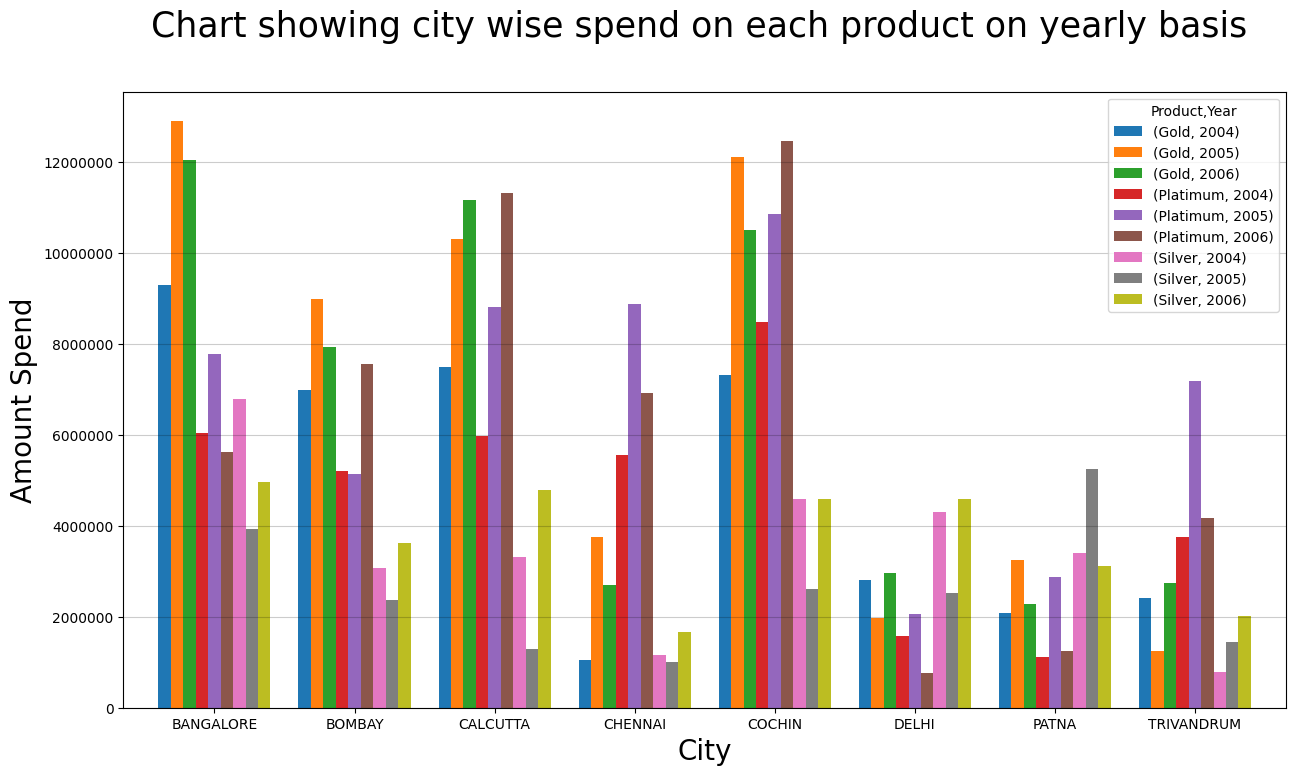

In [37]:
R = pd.merge(spend, cust_ac, on='Customer', how='left')[['City','Amount','Month','Product']]



R['Year'] = R['Month'].dt.year



S = R.groupby(by=['City','Product','Year'])[['Amount']].sum().reset_index()



T = S.pivot(index='City', columns=['Product','Year'], values='Amount')




T.plot(kind='bar', figsize=(15, 8), width=0.8)

plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0)
plt.title('Chart showing city wise spend on each product on yearly basis ', pad=40, fontsize=25)
plt.ylabel('Amount Spend', fontsize=20)
plt.xlabel('City', fontsize=20)
plt.grid(axis="y", alpha=0.2,color='black')
plt.show()


## 4. Create graphs for

#### a. Monthly comparison of total spends, city wise

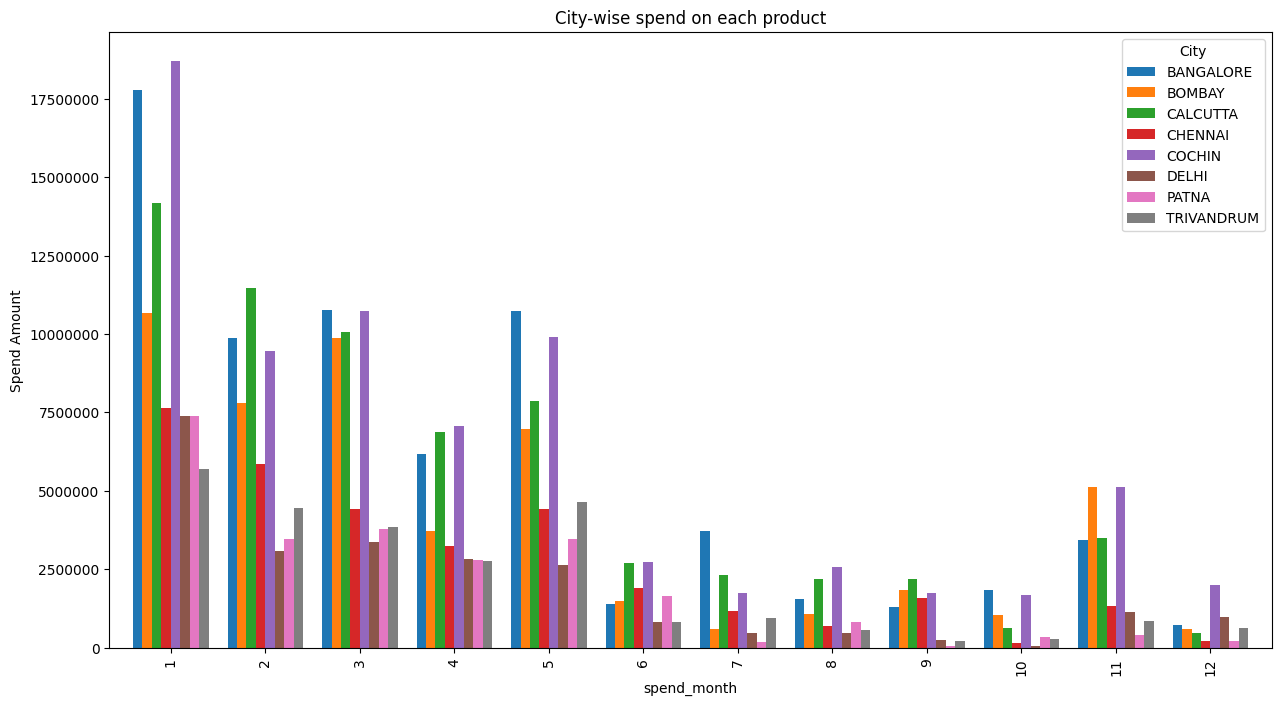

In [38]:
R['spend_month'] = R['Month'].dt.month



T = R.groupby(by=['spend_month', 'City'])[['Amount']].sum().reset_index()



U = T.pivot(index='spend_month', columns='City', values='Amount')



U.plot(kind='bar', width=0.8, figsize=(15, 8) )

plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("Spend Amount")
plt.title("City-wise spend on each product")
plt.show()

#### b. Comparison of yearly spend on air tickets

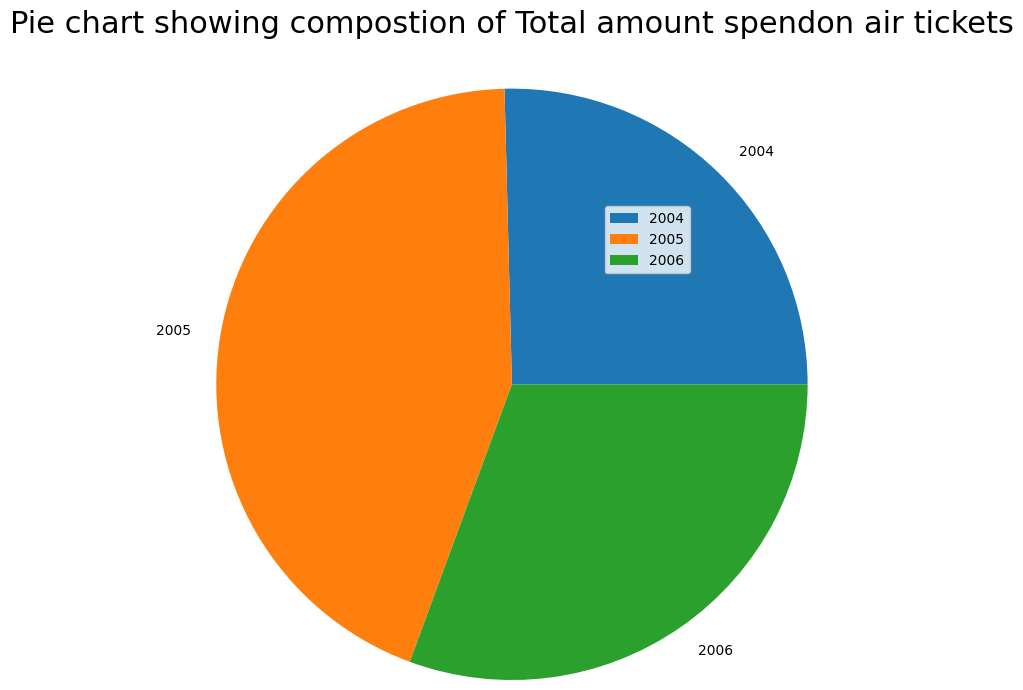

In [39]:
spend['Year'] = spend['Month'].dt.year



V = spend.loc[spend['Type'] == 'AIR TICKET'][['Year', 'Amount']].groupby(by='Year')[['Amount']].sum()



V.plot(y ='Amount' ,kind='pie', radius=2)
plt.legend(loc=1)
plt.title('Pie chart showing compostion of Total amount spendon air tickets', pad=120, fontsize=22)
plt.ylabel('')
plt.show()

#### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [40]:
spend['year_month'] = spend.Month.dt.strftime('%Y, %m')



W = pd.merge(spend, cust_ac, on='Customer', how='left')[['Amount','year_month','Product']]



X = W.groupby(by=['year_month','Product'])[['Amount']].sum().reset_index()



y_gold  = X[X['Product']=='Gold'].groupby(by=['year_month'])[['Amount']].sum().reset_index()
y_plat  = X[X['Product']=='Platimum'].groupby(by=['year_month'])[['Amount']].sum().reset_index()
y_silver  = X[X['Product']=='Silver'].groupby(by=['year_month'])[['Amount']].sum().reset_index()

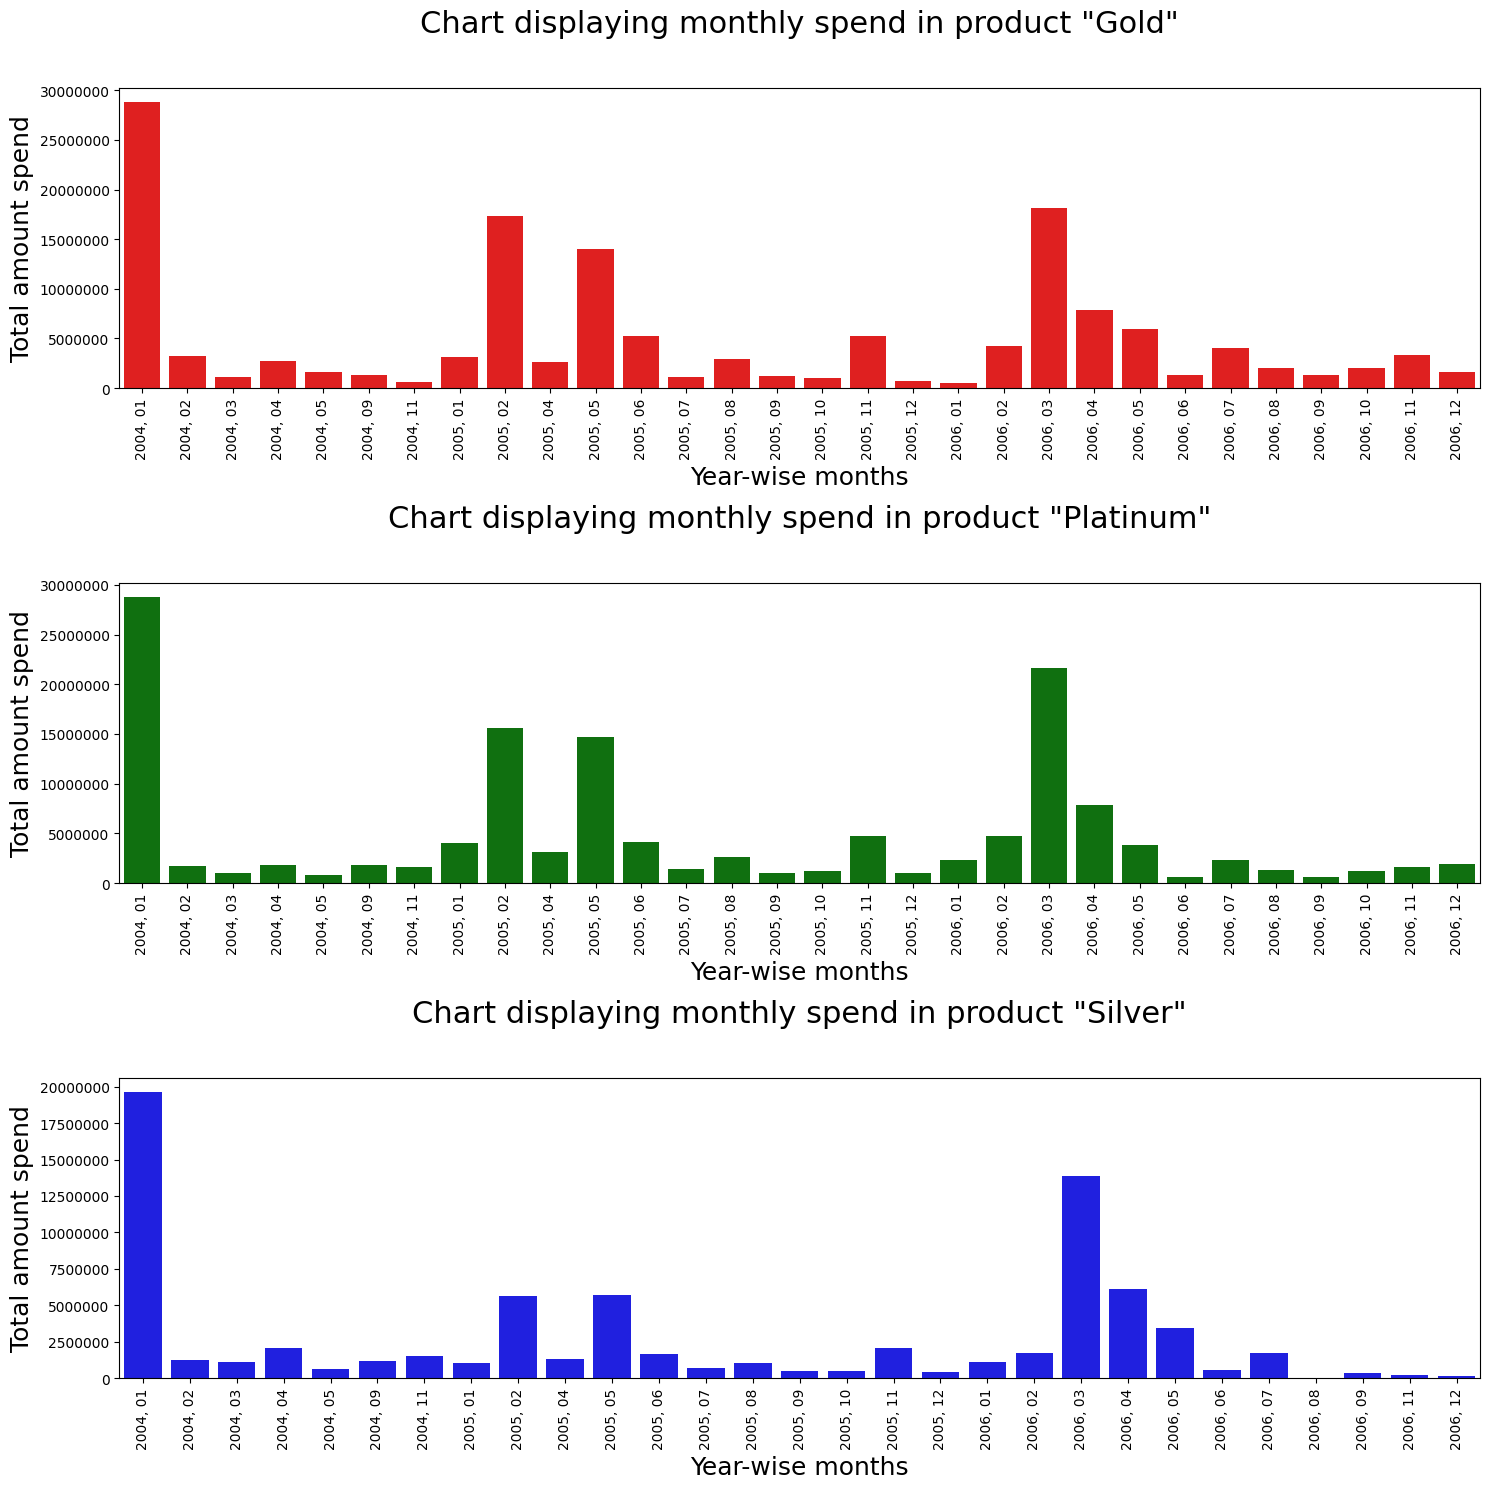

In [41]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
plt.ticklabel_format(style='plain')
sns.barplot(x=y_gold.year_month, y=y_gold.Amount, color='r')
plt.xticks(rotation=90)
plt.title('Chart displaying monthly spend in product "Gold"', pad=40, fontsize=22)
plt.xlabel('Year-wise months', fontsize=18)
plt.ylabel('Total amount spend',fontsize=18)


plt.subplot(3,1,2)
plt.ticklabel_format(style='plain')
sns.barplot(x=y_plat.year_month, y=y_plat.Amount, color='g')
plt.xticks(rotation=90)
plt.title('Chart displaying monthly spend in product "Platinum"', pad=40, fontsize=22)
plt.xlabel('Year-wise months',fontsize=18)
plt.ylabel('Total amount spend',fontsize=18)

plt.subplot(3,1,3)
plt.ticklabel_format(style='plain')
sns.barplot(x=y_silver.year_month, y=y_silver.Amount, color='b')
plt.xticks(rotation=90)
plt.title('Chart displaying monthly spend in product "Silver"', pad=40, fontsize=22)
plt.xlabel('Year-wise months',fontsize=18)
plt.ylabel('Total amount spend',fontsize=18)

plt.tight_layout()
plt.show()

In [42]:
W1 = pd.merge(spend, cust_ac, on='Customer', how='left')[['Amount','spend_month','Product']]




X1 = W1.groupby(by=['spend_month','Product'])[['Amount']].sum().reset_index()



y_gold1  = X1[X1['Product']=='Gold'].groupby(by=['spend_month'])[['Amount']].sum().reset_index()
y_plat1  = X1[X1['Product']=='Platimum'].groupby(by=['spend_month'])[['Amount']].sum().reset_index()
y_silver1  = X1[X1['Product']=='Silver'].groupby(by=['spend_month'])[['Amount']].sum().reset_index()

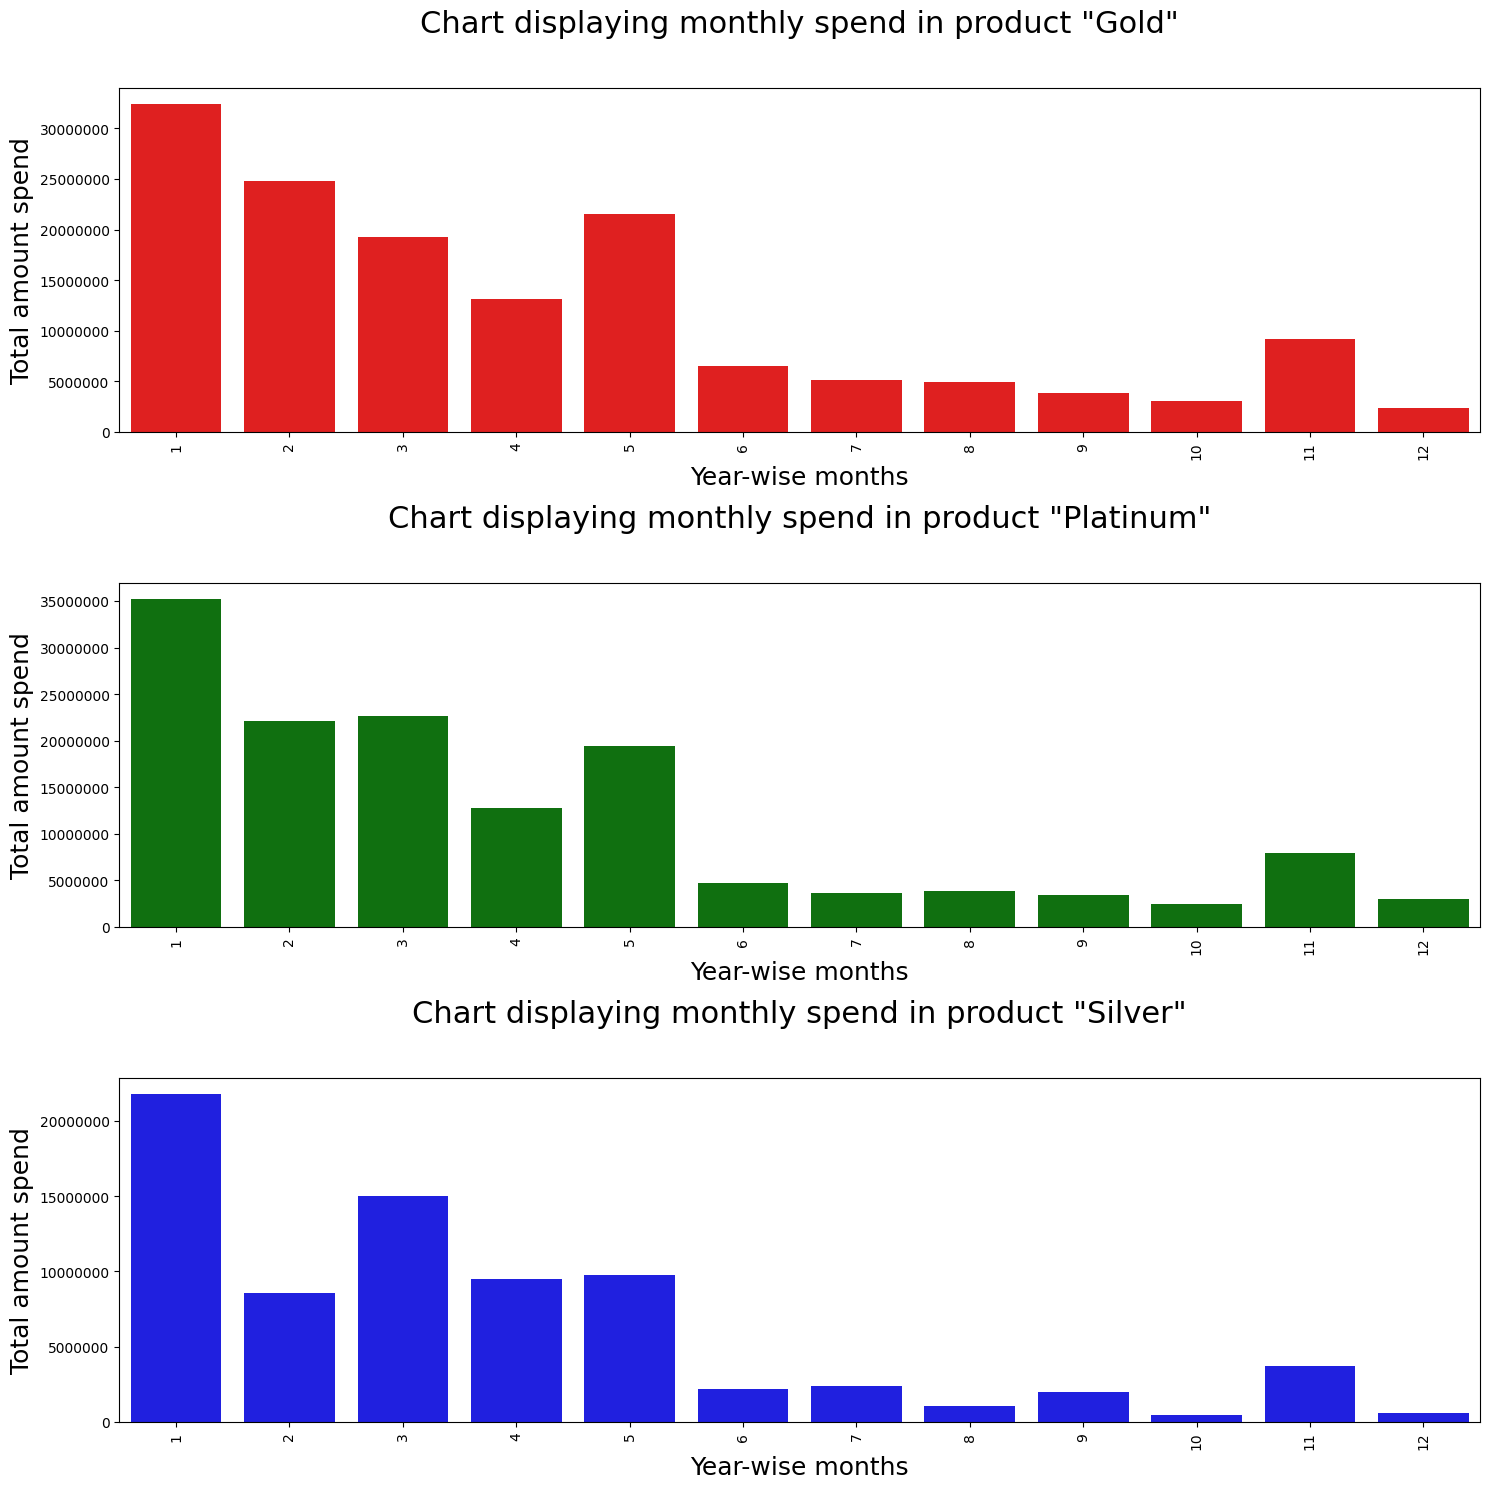

In [43]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
plt.ticklabel_format(style='plain')
sns.barplot(x=y_gold1.spend_month, y=y_gold1.Amount, color='r')
plt.xticks(rotation=90)
plt.title('Chart displaying monthly spend in product "Gold"', pad=40, fontsize=22)
plt.xlabel('Year-wise months', fontsize=18)
plt.ylabel('Total amount spend',fontsize=18)


plt.subplot(3,1,2)
plt.ticklabel_format(style='plain')
sns.barplot(x=y_plat1.spend_month, y=y_plat1.Amount, color='g')
plt.xticks(rotation=90)
plt.title('Chart displaying monthly spend in product "Platinum"', pad=40, fontsize=22)
plt.xlabel('Year-wise months',fontsize=18)
plt.ylabel('Total amount spend',fontsize=18)

plt.subplot(3,1,3)
plt.ticklabel_format(style='plain')
sns.barplot(x=y_silver1.spend_month, y=y_silver1.Amount, color='b')
plt.xticks(rotation=90)
plt.title('Chart displaying monthly spend in product "Silver"', pad=40, fontsize=22)
plt.xlabel('Year-wise months',fontsize=18)
plt.ylabel('Total amount spend',fontsize=18)

plt.tight_layout()
plt.show()

In [44]:
W2 = pd.merge(spend, cust_ac, on='Customer', how='left')[['Amount','Year','Product']]




X2 = W2.groupby(by=['Year','Product'])[['Amount']].sum().reset_index()



y_gold2  = X2[X2['Product']=='Gold'].groupby(by=['Year'])[['Amount']].sum().reset_index()
y_plat2  = X2[X2['Product']=='Platimum'].groupby(by=['Year'])[['Amount']].sum().reset_index()
y_silver2  = X2[X2['Product']=='Silver'].groupby(by=['Year'])[['Amount']].sum().reset_index()

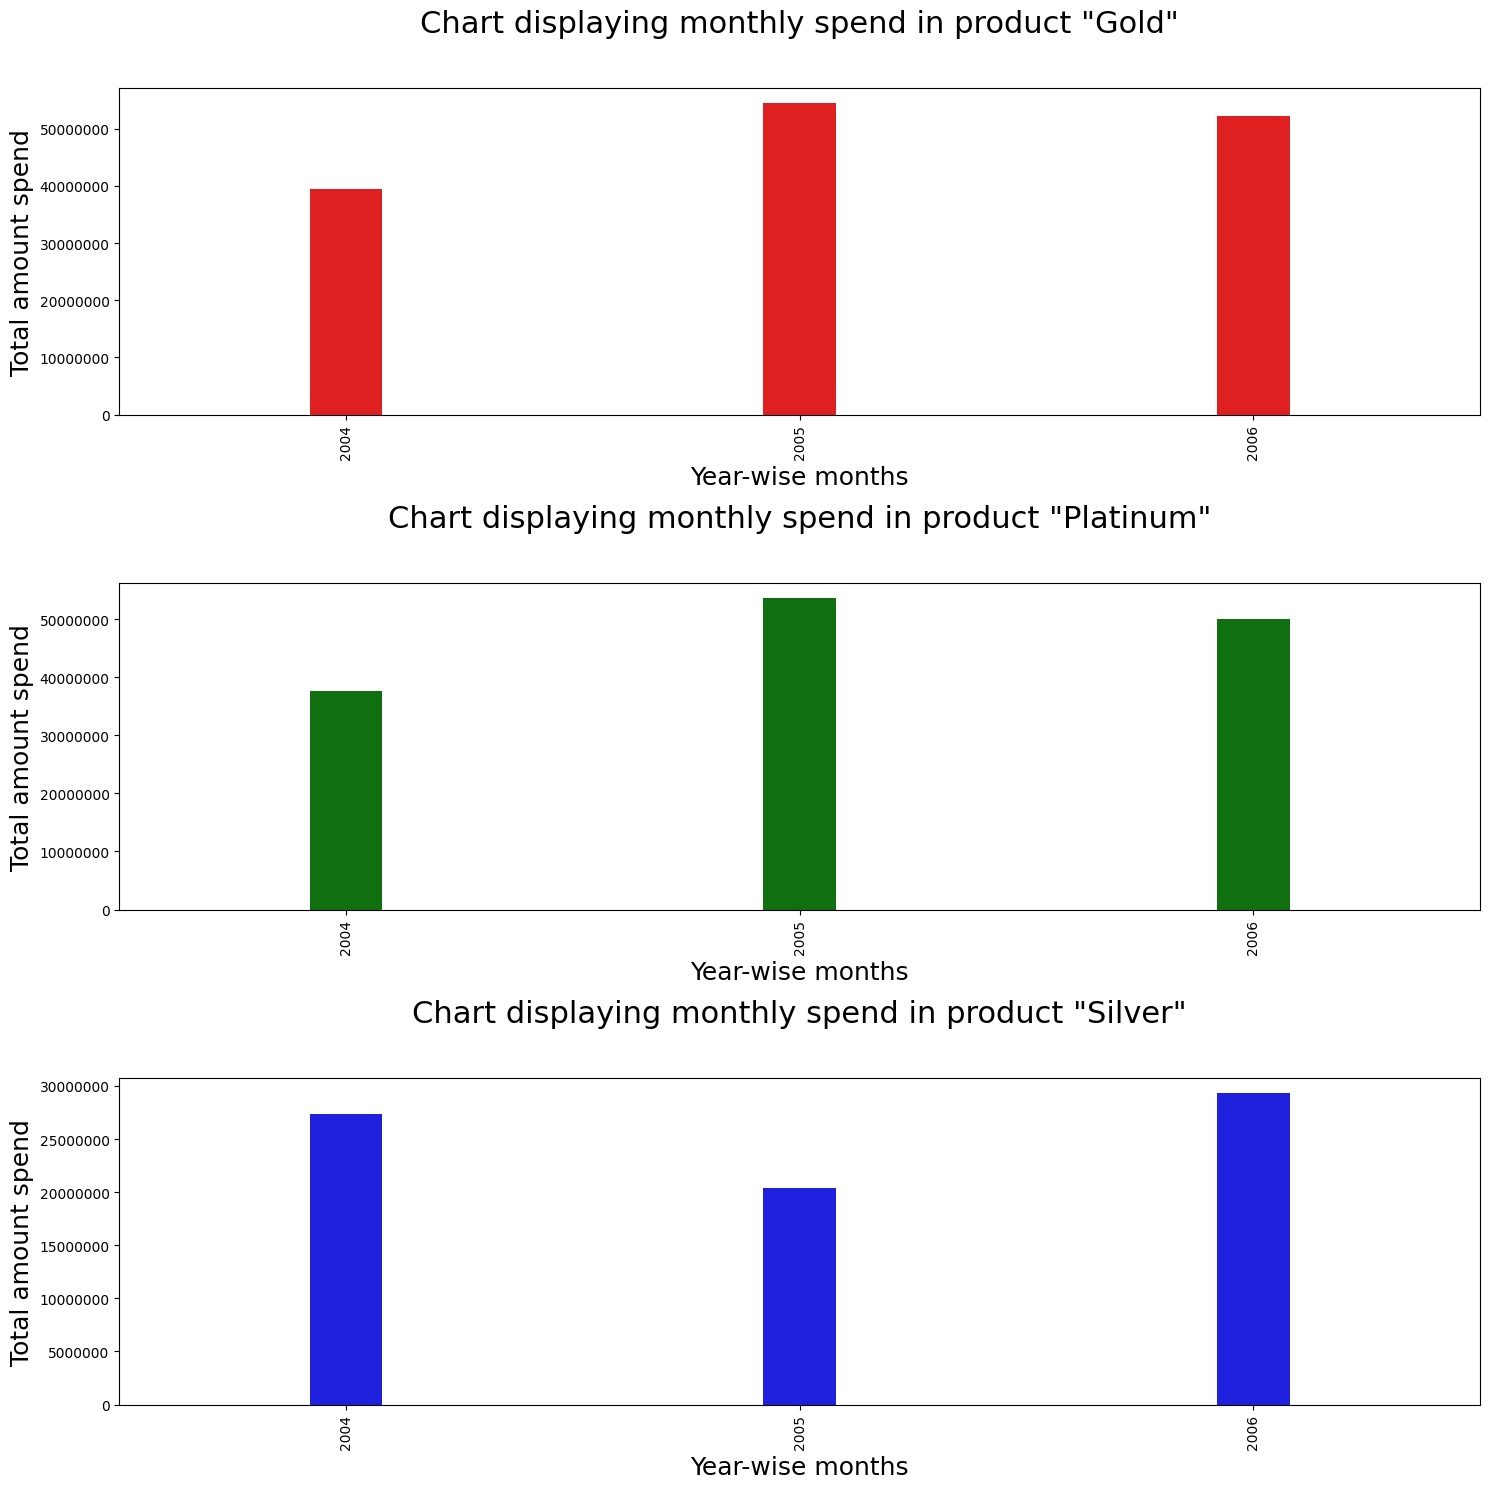

In [45]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
plt.ticklabel_format(style='plain')
sns.barplot(x=y_gold2.Year, y=y_gold2.Amount, color='r',width =0.16)
plt.xticks(rotation=90)
plt.title('Chart displaying monthly spend in product "Gold"', pad=40, fontsize=22)
plt.xlabel('Year-wise months', fontsize=18)
plt.ylabel('Total amount spend',fontsize=18)


plt.subplot(3,1,2)
plt.ticklabel_format(style='plain')
sns.barplot(x=y_plat2.Year, y=y_plat2.Amount, color='g',width =0.16)
plt.xticks(rotation=90)
plt.title('Chart displaying monthly spend in product "Platinum"', pad=40, fontsize=22)
plt.xlabel('Year-wise months',fontsize=18)
plt.ylabel('Total amount spend',fontsize=18)

plt.subplot(3,1,3)
plt.ticklabel_format(style='plain')
sns.barplot(x=y_silver2.Year, y=y_silver2.Amount, color='b',width =0.16)
plt.xticks(rotation=90)
plt.title('Chart displaying monthly spend in product "Silver"', pad=40, fontsize=22)
plt.xlabel('Year-wise months',fontsize=18)
plt.ylabel('Total amount spend',fontsize=18)

plt.tight_layout()
plt.show()



## Write user defined PYTHON function to perform the following analysis:


#### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [46]:
Z = pd.merge(payment, cust_ac, on='Customer', how='left')[['Customer','Amount', 'pay_year', 
                                                           'pay_month', 'Product','City']]



def find_top_10_customers(city, period, product):
    if period == 'yearly':
        filtered_data = Z[(Z['City'] == city) & (Z['Product'] == product)]
        top_10_customers = filtered_data.groupby('pay_year').apply(lambda x: 
                                                                   x.nlargest(10, 'Amount')).reset_index(drop=True)
    elif period == 'monthly':
        filtered_data = Z[(Z['City'] == city) & (Z['Product'] == product)]
        top_10_customers = filtered_data.groupby('pay_month').apply(lambda x: 
                                                                    x.nlargest(10, 'Amount')).reset_index(drop=True)
    else:
        return print("Invalid arguments specified.")
    return top_10_customers


'''Please note that the provided code will generate the top 10 customers for each month 
(if the 'monthly' option is selected) in the specified city and product. However, if the 'yearly' 
option is chosen, it will generate the top 10 customers for each year in the given city and product.
'''

find_top_10_customers('BANGALORE', 'yearly', 'Gold')

,Customer,Amount,pay_year,pay_month,Product,City
0,A13,498284.19,2004,1,Gold,BANGALORE
1,A30,496754.84,2004,5,Gold,BANGALORE
2,A1,495414.75,2004,1,Gold,BANGALORE
3,A43,471697.76,2004,1,Gold,BANGALORE
4,A13,465305.81,2004,1,Gold,BANGALORE
5,A43,460035.02,2004,1,Gold,BANGALORE
6,A14,453661.84,2004,4,Gold,BANGALORE
7,A1,453027.64,2004,1,Gold,BANGALORE
8,A13,439840.91,2004,9,Gold,BANGALORE
9,A1,437555.12,2004,1,Gold,BANGALORE
